In [2]:
!ls Applied-Deep-Learning-with-Keras

Lesson01  Lesson03  Lesson05  Lesson07	Lesson09  README.md
Lesson02  Lesson04  Lesson06  Lesson08	LICENSE


In [4]:
!ls Applied-Deep-Learning-with-Keras/Lesson02

백업		      cook_bank_data_feats.csv	 Exercise08.ipynb
Activity02.ipynb      cook_bank_data_target.csv  Exercise09.ipynb
bank_data_feats.csv   Exercise06.ipynb
bank_data_target.csv  Exercise07.ipynb


In [7]:
!ls Applied-Deep-Learning-with-Keras/Lesson02/data

cook_bank_data_feats.csv  cook_bank_data_target.csv


In [64]:
import pandas as pd

data = pd.read_csv(
    'Applied-Deep-Learning-with-Keras/Lesson02/data/cook_bank_data_feats.csv',
    index_col = 0
)

y = pd.read_csv(
    'Applied-Deep-Learning-with-Keras/Lesson02/data/cook_bank_data_target.csv',
    index_col = 0
)

X = data

In [65]:
# 과제 실습2에서는 안씀
from sklearn.model_selection import train_test_split

test_size = 0.2
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(
    feats, target, test_size=test_size, random_state=random_state
)

NameError: name 'feats' is not defined

In [66]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

NameError: name 'X_train' is not defined

In [4]:
from keras.models import Sequential

model = Sequential()

In [5]:
from keras.layers import Dense, Activation
from keras.models import Sequential


input_shape = X_train.shape[1]

# Dense(출력 개수, 활성화 함수, 입력 개수)
model.add(Dense(256, activation = 'tanh', input_dim = input_shape))

model.add(Dense(128, activation = 'tanh'))
model.add(Dense(96, activation = 'tanh'))
model.add(Dense(64, activation = 'tanh'))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(16, activation = 'tanh'))
model.add(Dense(8, activation = 'tanh'))

model.add(Dense(1, activation = 'sigmoid'))

In [6]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               3072      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 96)                12384     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                6208      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                5

In [8]:
history = model.fit(
    x=X_train, y=y_train['y'],
    epochs=10, batch_size=32, validation_split=0.2
)

Epoch 1/10
91/91 [==============================] - 0s 2ms/step - loss: 0.3803 - accuracy: 0.8679 - val_loss: 0.3278 - val_accuracy: 0.8936
Epoch 2/10
91/91 [==============================] - 0s 1ms/step - loss: 0.3439 - accuracy: 0.8804 - val_loss: 0.3092 - val_accuracy: 0.8936
Epoch 3/10
91/91 [==============================] - 0s 1ms/step - loss: 0.3301 - accuracy: 0.8804 - val_loss: 0.3073 - val_accuracy: 0.8936
Epoch 4/10
91/91 [==============================] - 0s 1ms/step - loss: 0.3271 - accuracy: 0.8804 - val_loss: 0.3254 - val_accuracy: 0.8936
Epoch 5/10
91/91 [==============================] - 0s 1ms/step - loss: 0.3400 - accuracy: 0.8786 - val_loss: 0.3341 - val_accuracy: 0.8936
Epoch 6/10
91/91 [==============================] - 0s 1ms/step - loss: 0.3284 - accuracy: 0.8804 - val_loss: 0.3164 - val_accuracy: 0.8936
Epoch 7/10
91/91 [==============================] - 0s 1ms/step - loss: 0.3310 - accuracy: 0.8807 - val_loss: 0.3298 - val_accuracy: 0.8936
Epoch 8/10
91/91 [==

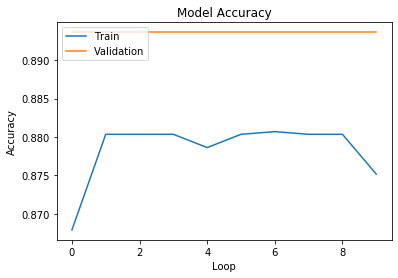

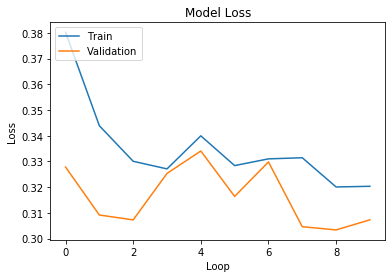

In [9]:
import matplotlib.pyplot as plt

# 학습 및 검증 정확성 값 도식화
accuracy_f = plt.plot(history.history['accuracy'])
val_accuracy_f = plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Loop')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



# 학습 및 검증 손실 값 도식화
loss_f = plt.plot(history.history['loss'])
val_loss_f = plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Loop')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



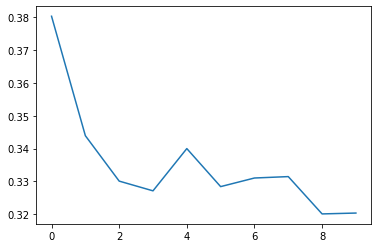

In [10]:
print(plt.plot(history.history['loss']))

In [1]:
print(history.history['loss'])

NameError: name 'history' is not defined

In [56]:
# Hyper Parameter(초 매개변수)
# 교차 검증을 통해서 어떤 녀석을 활용하는 것이 가장 좋은지 판정할 수 있다.
# 물론 난 컴퓨터를 사용할 수 없게 된다.

import numpy as np
from keras.models import Sequential
from keras.layers import Dense

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score


n_folds = 5

seed = 1
np.random.seed(seed)

results = []


def model_build2(activation = 'relu', optimizer = 'adam'):
    model = Sequential()
    
    model.add(Dense(16, input_dim = X.shape[1], activation = activation))
    model.add(Dense(8, activation = activation))
    model.add(Dense(4, activation = activation))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(
        loss = 'binary_crossentropy',
        optimizer = optimizer,
        metrics = ['accuracy']
    )
    
    return model


optimizers = ['sgd', 'adam']
activations = ['relu', 'tanh']

for opt in range(len(optimizers)):
    for active in range(len(activations)):
        optimizer = optimizers[opt]
        activation = activations[active]
        
        classifier = KerasClassifier(
            build_fn = model_build2,
            epochs = 3,
            batch_size = 5,
            verbose = 1
        )
        
        kfold = StratifiedKFold(
            n_splits = n_folds,
            shuffle = True,
            random_state = seed
        )
        
        result = cross_val_score(classifier, X, y, cv = kfold)
        
        results.append(result)

Epoch 1/3
724/724 [==============================] - 2s 2ms/step - loss: 1.2702 - accuracy: 0.8438
Epoch 2/3
724/724 [==============================] - 2s 3ms/step - loss: 0.4471 - accuracy: 0.8794
Epoch 3/3
181/181 [==============================] - 0s 483us/step - loss: 0.3733 - accuracy: 0.8829
Epoch 1/3
724/724 [==============================] - 1s 1ms/step - loss: 2.7906 - accuracy: 0.8590
Epoch 2/3
724/724 [==============================] - 2s 2ms/step - loss: 0.4485 - accuracy: 0.8847
Epoch 3/3
181/181 [==============================] - 0s 509us/step - loss: 0.3626 - accuracy: 0.8850
Epoch 1/3
724/724 [==============================] - 1s 2ms/step - loss: 1.2603 - accuracy: 0.8443
Epoch 2/3
724/724 [==============================] - 1s 2ms/step - loss: 1.2377 - accuracy: 0.8471
Epoch 3/3
181/181 [==============================] - 0s 467us/step - loss: 1.8866 - accuracy: 0.8595
Epoch 1/3
724/724 [==============================] - 1s 1ms/step - loss: 4.8594 - accuracy: 0.7965
Epoc

In [63]:
c = 0
maxValue = results[0].mean()
best_hparam1 = activations[0]
best_hparam2 = optimizers[0]


for opt in range(len(optimizers)):
    for active in range(len(activations)):
        print("activation =", activations[active])
        print("optimizer =", optimizers[opt])
        
        print("Test Accuracy =", results[c].mean())
        print("")
        if maxValue < results[c].mean():
            maxValue = results[c].mean()
            
            #print("디버깅1")
            #print(best_hparam1)
            best_hparam1 = activations[active]        
            best_hparam2 = optimizers[opt]
            
        c += 1
            
        
print("")
print("맥스값 :", maxValue)
print("맥스값의 하이퍼 파라미터 값 1 :", best_hparam1)
print("맥스값의 하이퍼 파라미터 값 2 :", best_hparam2)

activation = relu
optimizer = sgd
Test Accuracy = 0.8801144123077392

activation = tanh
optimizer = sgd
Test Accuracy = 0.8845391988754272

activation = relu
optimizer = adam
Test Accuracy = 0.8840964674949646

activation = tanh
optimizer = adam
Test Accuracy = 0.8575480461120606


맥스값 : 0.8845391988754272
맥스값의 하이퍼 파라미터 값 1 : tanh
맥스값의 하이퍼 파라미터 값 2 : sgd


In [19]:
results[3].mean()

0.8840964674949646

In [42]:
optimizers[opt]

'adam'

In [12]:
# 파이썬 서버 구축

In [58]:
from flask import Flask, jsonify

import requests
import json

In [59]:
# pip install flask_restful
from flask_restful import Resource, Api, reqparse

In [60]:
app = Flask(__name__)
api = Api(app)

@app.route('/dataServer')
def PythonServerResponse():
    print("It's operate")
    
   
    summary = {
                'HP_1' : best_hparam1,
                'HP_2': best_hparam2            
              }
    return jsonify(summary)

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Jul/2020 19:28:25] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [10/Jul/2020 19:28:25] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [10/Jul/2020 19:29:42] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [10/Jul/2020 19:29:48] "GET /dataServer HTTP/1.1" 200 -


It's operate


127.0.0.1 - - [10/Jul/2020 19:30:33] "GET /dataServer HTTP/1.1" 200 -


It's operate


127.0.0.1 - - [10/Jul/2020 19:30:33] "GET /dataServer HTTP/1.1" 200 -


It's operate


127.0.0.1 - - [10/Jul/2020 19:30:34] "GET /dataServer HTTP/1.1" 200 -


It's operate


127.0.0.1 - - [10/Jul/2020 19:30:34] "GET /dataServer HTTP/1.1" 200 -
127.0.0.1 - - [10/Jul/2020 19:30:34] "GET /dataServer HTTP/1.1" 200 -


It's operate
It's operate


127.0.0.1 - - [10/Jul/2020 19:30:34] "GET /dataServer HTTP/1.1" 200 -


It's operate


127.0.0.1 - - [10/Jul/2020 19:30:34] "GET /dataServer HTTP/1.1" 200 -
127.0.0.1 - - [10/Jul/2020 19:30:35] "GET /dataServer HTTP/1.1" 200 -


It's operate
It's operate


127.0.0.1 - - [10/Jul/2020 19:36:55] "GET /dataServer HTTP/1.1" 200 -


It's operate
